In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from common import *
from sklearn import svm
from matplotlib import style
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
  



In [40]:
X_train = pd.read_csv('../Joep/X_train.csv', sep = ',')
y_train = pd.read_csv('../Joep/y_train.csv', sep = ',')

X_test = pd.read_csv('../Joep/X_test.csv', sep = ',')
y_test = pd.read_csv('../Joep/y_test.csv', sep = ',')

In [41]:
#Create a svm Classifier
model = svm.SVC(kernel='rbf', C = 1.0)

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 training score: 0.9437751004016064
 testing score: 0.7433628318584071


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


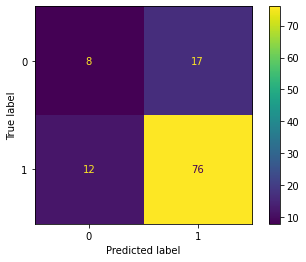

8 17 12 76
False negative rate: 0.183
Accuracy test set: 74.336
Accuracy train set: 94.378


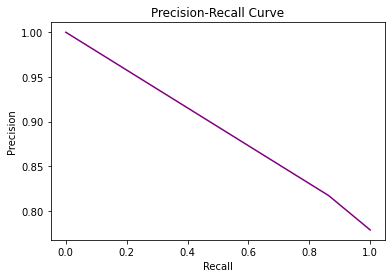

In [42]:
evaluating(X_test, y_test, X_train, y_train, model)

In [43]:
from sklearn.svm import SVC
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve( SVC(),X_train, y_train,param_name="gamma", param_range=param_range,scoring="accuracy", n_jobs=2)

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [44]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

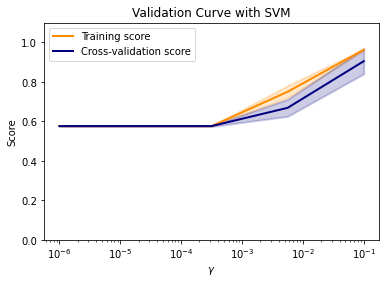

In [45]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()